In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [25]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
print(query_url)



for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    

http://api.openweathermap.org/data/2.5/weather?appid=4830a70ff57de4f62bacecf7cf9ca515&units=imperial&q=
Processing Record 1 of Set 1 : cabo san lucas
Processing Record 2 of Set 1 : vaini
Processing Record 3 of Set 1 : nemuro
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : bluff
Processing Record 6 of Set 1 : punta arenas
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : butaritari
City not found. Skipping...
Processing Record 9 of Set 1 : nanortalik
Processing Record 10 of Set 1 : puerto ayora
Processing Record 11 of Set 1 : east london
Processing Record 12 of Set 1 : gorontalo
Processing Record 13 of Set 1 : busselton
Processing Record 14 of Set 1 : calabozo
Processing Record 15 of Set 1 : gemena
Processing Record 16 of Set 1 : lebu
Processing Record 17 of Set 1 : nikolskoye
Processing Record 18 of Set 1 : albany
Processing Record 19 of Set 1 : port hardy
Processing Record 20 of Set 1 : avera
Processing Record 21 of Set 1 : paso de los toros
P

Processing Record 35 of Set 4 : bosaso
Processing Record 36 of Set 4 : kirakira
Processing Record 37 of Set 4 : san patricio
Processing Record 38 of Set 4 : alikalia
Processing Record 39 of Set 4 : amurzet
Processing Record 40 of Set 4 : mucurapo
Processing Record 41 of Set 4 : pyaozerskiy
Processing Record 42 of Set 4 : half moon bay
Processing Record 43 of Set 4 : kidal
City not found. Skipping...
Processing Record 44 of Set 4 : aripuana
Processing Record 45 of Set 4 : wilmington
Processing Record 46 of Set 4 : kyzyl-suu
Processing Record 47 of Set 4 : thurso
Processing Record 48 of Set 4 : norman wells
Processing Record 49 of Set 4 : amuntai
Processing Record 50 of Set 4 : laramie
Processing Record 0 of Set 5 : salaga
Processing Record 1 of Set 5 : broome
Processing Record 2 of Set 5 : port keats
Processing Record 3 of Set 5 : yenagoa
Processing Record 4 of Set 5 : puerto colombia
Processing Record 5 of Set 5 : mount gambier
Processing Record 6 of Set 5 : kalabo
City not found. Skip

Processing Record 20 of Set 8 : alice springs
Processing Record 21 of Set 8 : krasnoselkup
Processing Record 22 of Set 8 : punta alta
Processing Record 23 of Set 8 : langsa
Processing Record 24 of Set 8 : shenjiamen
Processing Record 25 of Set 8 : darnah
Processing Record 26 of Set 8 : lata
Processing Record 27 of Set 8 : cockburn town
Processing Record 28 of Set 8 : les cayes
Processing Record 29 of Set 8 : teluknaga
Processing Record 30 of Set 8 : lokoja
Processing Record 31 of Set 8 : picos
Processing Record 32 of Set 8 : hatillo
Processing Record 33 of Set 8 : ko samui
Processing Record 34 of Set 8 : taft
Processing Record 35 of Set 8 : sola
Processing Record 36 of Set 8 : pisco
Processing Record 37 of Set 8 : mizan teferi
Processing Record 38 of Set 8 : kargil
Processing Record 39 of Set 8 : tura
City not found. Skipping...
Processing Record 40 of Set 8 : tautira
Processing Record 41 of Set 8 : japura
Processing Record 42 of Set 8 : paamiut
Processing Record 43 of Set 8 : bima
Pro

In [ ]:
Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame
   


In [27]:
weather_df = pd.DataFrame({"City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
    
})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,57,MX,1632001931,71,22.8909,-109.9124,92.80,10.51
1,Vaini,75,TO,1632002209,94,-21.2000,-175.2000,75.36,6.91
2,Nemuro,83,JP,1632002210,94,43.3236,145.5750,59.23,16.44
3,Mataura,100,NZ,1632002210,92,-46.1927,168.8643,44.47,4.79
4,Bluff,100,NZ,1632002210,78,-46.6000,168.3333,44.80,12.08


In [29]:
#Count data
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [31]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000
mean,54.132486,1.632002e+09,71.462795,19.699379,15.605049,65.954882,8.115789
std,38.395249,1.379940e+02,21.046571,32.794740,89.015126,16.738054,5.647387
min,0.000000,1.632002e+09,2.000000,-54.800000,-175.200000,12.360000,0.000000
25%,13.000000,1.632002e+09,63.500000,-6.980650,-61.803450,54.535000,3.725000
50%,61.000000,1.632002e+09,76.000000,21.461200,17.944200,70.180000,6.780000
75%,92.500000,1.632003e+09,87.000000,47.541700,86.740100,79.115000,11.285000
max,100.000000,1.632003e+09,100.000000,78.218600,179.316700,99.930000,31.470000


In [33]:
weather_df.to_csv("cities.csv", index = False)

In [34]:
 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

SyntaxError: invalid syntax (<ipython-input-34-a8731d9126ce>, line 1)

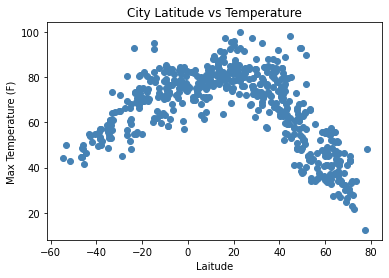

In [37]:
#Latitude vs. Temperature Plot

 #Create Latitude vs. Temperature Plot scatter plot
    
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],facecolor = "steelblue")
plt.title("City Latitude vs Temperature")
# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Max Temperature.png")


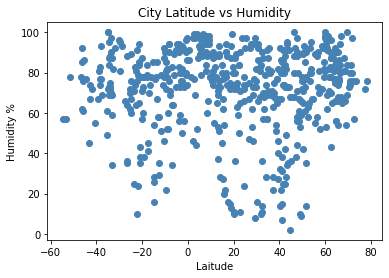

In [39]:
#  Latitude vs. Humidity Plot

plt.scatter(weather_df['Lat'],weather_df['Humidity'],facecolor = "steelblue")
plt.title("City Latitude vs Humidity")
# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity %")

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity.png")



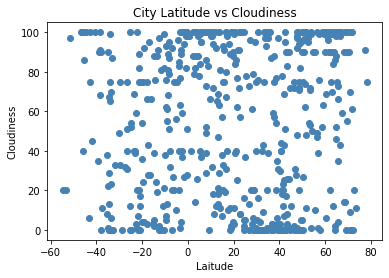

In [41]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],facecolor = "steelblue")
plt.title("City Latitude vs Cloudiness")
# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness.png")



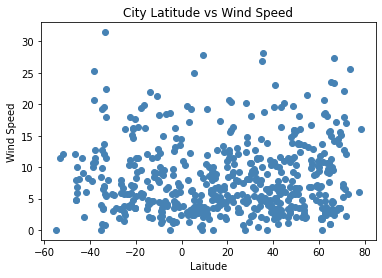

In [43]:
#Latitude vs. Wind Speed Plot

plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],facecolor = "steelblue")
plt.title("City Latitude vs Wind Speed")
# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed.png")

In [44]:
Linear Regression

SyntaxError: invalid syntax (<ipython-input-44-90f603ef5683>, line 1)

The r-squared is : -0.79


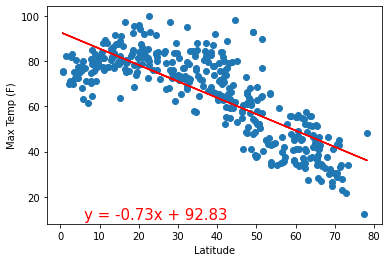

<Figure size 432x288 with 0 Axes>

In [51]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regressio

north_hemp_df= weather_df.loc[weather_df['Lat']>=0]


# creating linear agression and scatter plot

x_values = north_hemp_df['Lat']
y_values = north_hemp_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
plt.savefig("northen Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.76


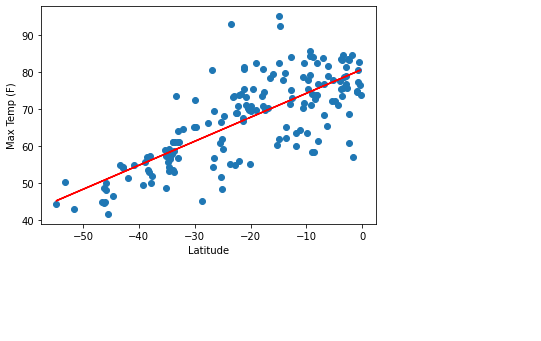

<Figure size 432x288 with 0 Axes>

In [54]:
south_hemp_df = weather_df.loc[weather_df['Lat']< 0]

x = south_hemp_df['Lat']
y = south_hemp_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
plt.savefig("Sourthen Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.01


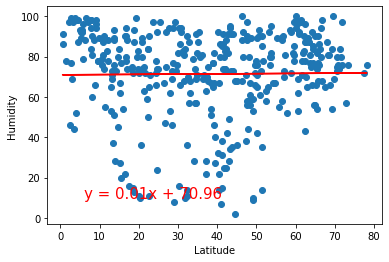

<Figure size 432x288 with 0 Axes>

In [56]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶
x_values = north_hemp_df['Lat']
y_values = north_hemp_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.03


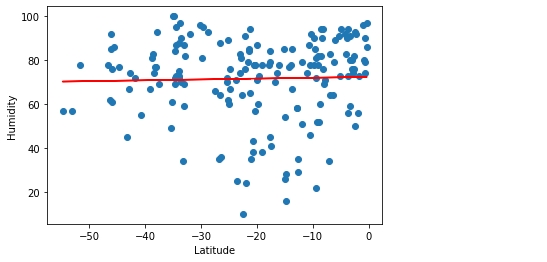

<Figure size 432x288 with 0 Axes>

In [58]:
south_hemp_df = weather_df.loc[weather_df['Lat']< 0]

x = south_hemp_df['Lat']
y = south_hemp_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.05


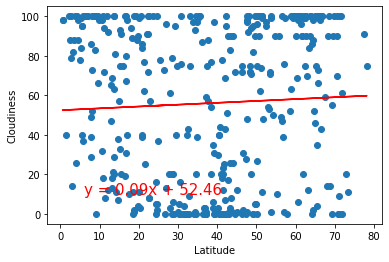

<Figure size 432x288 with 0 Axes>

In [60]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north_hemp_df['Lat']
y_values = north_hemp_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-squared is : 0.05


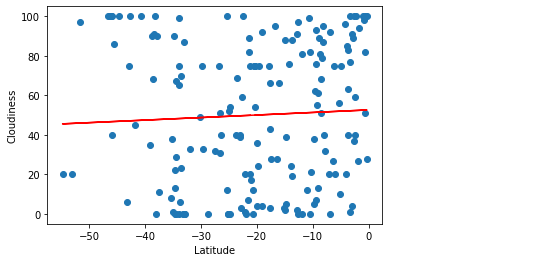

<Figure size 432x288 with 0 Axes>

In [62]:
x = south_hemp_df['Lat']
y = south_hemp_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("Southern Hemispher -Cloudiness vs. Latitude Linear Regression.png")

The r-squared is : 0.15


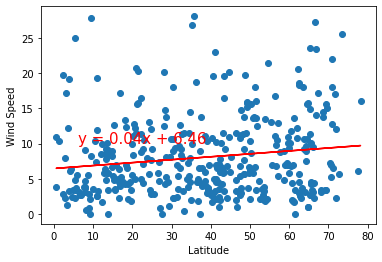

<Figure size 432x288 with 0 Axes>

In [64]:
#Northern Hemisphere - windspeed vs. Latitude Linear Regression
x_values = north_hemp_df['Lat']
y_values = north_hemp_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("Northern Hemisphere - Wind speed vs. Latitude Linear Regression.png")

The r-squared is : -0.12


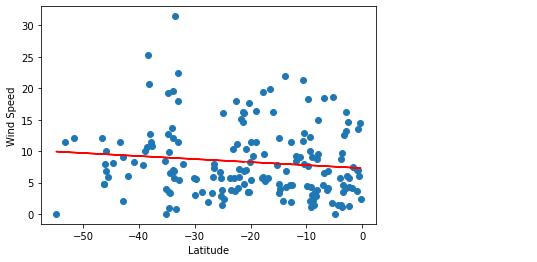

<Figure size 432x288 with 0 Axes>

In [65]:
x = south_hemp_df['Lat']
y = south_hemp_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("Southern Hemispher -Wind Speed vs. Latitude Linear Regression.png")